# LDA MODELLING FOR ALL DATA

In [1]:
# Import Packages
from imp import reload
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tool_functions import *
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity

# Data Extraction

In [2]:
funding = MySQLPipline(database='funding')

In [3]:
NSFdata = funding.NSFDataset()
NSFdata["institution"] = ["NSF"] * NSFdata.shape[0]

In [4]:
NIHdata = funding.NIHDataset()
NIHdata["institution"] = ["NIH"] * NIHdata.shape[0]

In [5]:
ERCdata = funding.ERCDataset()
ERCdata["institution"] = ["ERC"] * ERCdata.shape[0]

In [6]:
UKRIdata = funding.UKRIDataset()
UKRIdata["institution"] = ["UKRI"] * UKRIdata.shape[0]

In [7]:
funding.close_Conn()

In [8]:
df1 = pd.concat([NIHdata[["title", "abstract", "institution"]],
                ERCdata[["title", "abstract", "institution"]]])
df2 = pd.concat([NSFdata[["title", "abstract", "institution"]],
                UKRIdata[["title", "abstract", "institution"]]])
df = pd.concat([df1, df2])
df.reset_index(drop=True, inplace=True)

# Data Processing

In [9]:
pp = nlp_ldamodel.preprocessor(dataset = df)

In [10]:
pp.remove_abstract(regex=r'Abstracts are not currently available in GtR').reset_index(drop = True, inplace = True)
pp.remove_abstract(regex=r'No abstract available').reset_index(drop = True, inplace = True)

In [11]:
pp.dataset = pp.dataset[~pd.isna(pp.dataset.title)]
pp.reset_index()

In [12]:
pp.clean_text()

This may take long time to run...
Finished! It takes 74.83084011077881 seconds to run.


,title,abstract,institution
0,Novel Treatments for Ocular Surface Diseases,PROJECT DESCRIPTION ABSTRACT Dry eye disease D...,NIH
1,SYNTHETIC GENE CIRCUITS FOR MONITORING T CELL ...,Chimeric antigen receptor CAR T cell therapy h...,NIH
2,Training Program in Cancer Biology,Project Summary The Icahn School of Medicine a...,NIH
3,Understanding the influence of bone metastatic...,While immunotherapies have made strides in the...,NIH
4,Modeling bladder cancer pathogenesis and tumor...,Project Summary Abstract This new Program Proj...,NIH
...,...,...,...
173210,Work of Words Re reading the poetry of Dylan ...,This project is the first to systematically ap...,UKRI
173211,Surface rupture in the 12 May 2008 Sichuan ear...,The May earthquake in Sichuan Province China h...,UKRI
173212,Influences on negotiating clinical need amp ...,This study examines how patients and dentists ...,UKRI
173213,DiRAC2 100 Tflop s HPC cluster procurement,This award covers the capital cost of procurin...,UKRI


In [13]:
pp.reset_index()

In [14]:
df_cleaned = pp.dataset

In [15]:
%store df_cleaned

Stored 'df_cleaned' (DataFrame)


In [21]:
pp.dataset.to_csv("../Data/cleanData.csv", index = False)

In [23]:
pd.read_csv("../Data/cleanData.csv")

,title,abstract,institution
0,Novel Treatments for Ocular Surface Diseases,PROJECT DESCRIPTION ABSTRACT Dry eye disease D...,NIH
1,SYNTHETIC GENE CIRCUITS FOR MONITORING T CELL ...,Chimeric antigen receptor CAR T cell therapy h...,NIH
2,Training Program in Cancer Biology,Project Summary The Icahn School of Medicine a...,NIH
3,Understanding the influence of bone metastatic...,While immunotherapies have made strides in the...,NIH
4,Modeling bladder cancer pathogenesis and tumor...,Project Summary Abstract This new Program Proj...,NIH
...,...,...,...
173210,Work of Words Re reading the poetry of Dylan ...,This project is the first to systematically ap...,UKRI
173211,Surface rupture in the 12 May 2008 Sichuan ear...,The May earthquake in Sichuan Province China h...,UKRI
173212,Influences on negotiating clinical need amp ...,This study examines how patients and dentists ...,UKRI
173213,DiRAC2 100 Tflop s HPC cluster procurement,This award covers the capital cost of procurin...,UKRI


# LDA Model Creating

In [23]:
# df = pd.read_csv("../Data/cleaned_data.csv", encoding = "utf-8-sig")

In [24]:
# %store -r df_cleaned

In [25]:
# mp2 = modelProcessor(dat = df_cleaned)

In [26]:
def get_tfidf(docList):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(docList)
    feature_names = vectorizer.get_feature_names()
    dense = vectors.todense()
    denselist = dense.tolist()
    tfidf = pd.DataFrame(denselist, columns=feature_names)
    return tfidf

In [27]:
pp.remove_stop_words()

Finished! It takes 68.73696994781494 seconds to run.


,title,abstract,institution,corpus
0,Novel Treatments for Ocular Surface Diseases,PROJECT DESCRIPTION ABSTRACT Dry eye disease ...,NIH,"[dry, eye, disease, ded, ocular, surface, dise..."
1,SYNTHETIC GENE CIRCUITS FOR MONITORING T-CELL ...,Chimeric antigen receptor CAR T cell therapy...,NIH,"[chimeric, antigen, receptor, car, cell, thera..."
2,Training Program in Cancer Biology,Project Summary The Icahn School of Medicine a...,NIH,"[icahn, school, medicine, mount, sinai, propos..."
3,Understanding the influence of bone-metastatic...,While immunotherapies have made strides in the...,NIH,"[immunotherapies, strides, treatment, cancers,..."
4,Modeling bladder cancer pathogenesis and tumor...,Project Summary Abstract This new Program Pr...,NIH,"[investigate, molecular, mechanisms, underlyin..."
...,...,...,...,...
173607,Work of Words: Re-reading the poetry of Dylan ...,This project is the first to systematically ap...,UKRI,"[systematically, apply, modern, critical, theo..."
173608,Surface rupture in the 12 May 2008 Sichuan ear...,The May earthquake in Sichuan Province China ...,UKRI,"[earthquake, sichuan, province, china, magnitu..."
173609,Influences on negotiating clinical need &amp; ...,This study examines how patients and dentists ...,UKRI,"[patients, dentists, decide, pursue, treatment..."
173610,DiRAC2: 100 Tflop/s HPC cluster procurement,This award covers the capital cost of procurin...,UKRI,"[award, covers, capital, cost, procuring, tflo..."


In [29]:
df_noStopWords = pp.dataset
%store df_noStopWords

Stored 'df_noStopWords' (DataFrame)


# Stemming and Lemmatization

In [2]:
%store -r df_noStopWords
pp = nlp_ldamodel.preprocessor(dataset = df_noStopWords)

In [3]:
pp.dataset.reset_index(drop = True, inplace = True)

In [4]:
pp.word_stemmer(getSet = True)

start stemming...
Stemming finished! Stemming takes 2851.982408761978 seconds to run


,title,abstract,institution,corpus,corpus_stemmed,corpusSet
0,Novel Treatments for Ocular Surface Diseases,PROJECT DESCRIPTION ABSTRACT Dry eye disease ...,NIH,"[dry, eye, disease, ded, ocular, surface, dise...","[dri, eye, diseas, ded, ocular, surfac, diseas...","{long, condit, vitro, reduc, life, ocular, opp..."
1,SYNTHETIC GENE CIRCUITS FOR MONITORING T-CELL ...,Chimeric antigen receptor CAR T cell therapy...,NIH,"[chimeric, antigen, receptor, car, cell, thera...","[chimer, antigen, receptor, car, cell, therapi...","{type, failur, independ, blockad, respond, pla..."
2,Training Program in Cancer Biology,Project Summary The Icahn School of Medicine a...,NIH,"[icahn, school, medicine, mount, sinai, propos...","[icahn, school, medicin, mount, sinai, propos,...","{confer, outstand, remark, establish, document..."
3,Understanding the influence of bone-metastatic...,While immunotherapies have made strides in the...,NIH,"[immunotherapies, strides, treatment, cancers,...","[immunotherapi, stride, treatment, cancer, cas...","{driven, immunocompet, castrat, microenvironme..."
4,Modeling bladder cancer pathogenesis and tumor...,Project Summary Abstract This new Program Pr...,NIH,"[investigate, molecular, mechanisms, underlyin...","[investig, molecular, mechan, underli, pathoge...","{patholog, interrel, haa, maintain, chromatin,..."
...,...,...,...,...,...,...
173607,Work of Words: Re-reading the poetry of Dylan ...,This project is the first to systematically ap...,UKRI,"[systematically, apply, modern, critical, theo...","[systemat, appli, modern, critic, theori, bodi...","{poem, materi, systemat, pastor, hybrid, final..."
173608,Surface rupture in the 12 May 2008 Sichuan ear...,The May earthquake in Sichuan Province China ...,UKRI,"[earthquake, sichuan, province, china, magnitu...","[earthquak, sichuan, provinc, china, magnitud,...","{damag, mm, long, work, mountain, view, orient..."
173609,Influences on negotiating clinical need &amp; ...,This study examines how patients and dentists ...,UKRI,"[patients, dentists, decide, pursue, treatment...","[patient, dentist, decid, pursu, treatment, in...","{recommend, sampl, privat, patient, east, reac..."
173610,DiRAC2: 100 Tflop/s HPC cluster procurement,This award covers the capital cost of procurin...,UKRI,"[award, covers, capital, cost, procuring, tflo...","[award, cover, capit, cost, procur, tflop, hpc...","{procur, leicest, host, cost, univers, cluster..."


In [5]:
df_stemmed = pp.dataset
%store df_stemmed

Stored 'df_stemmed' (DataFrame)


In [6]:
all_corpus = pp.getAllCorpus(colname = 'corpus_stemmed')

In [7]:
len(all_corpus)

35214159

In [8]:
len(set(all_corpus))

246256

# Test

In [18]:
# unimpWords1 = []
# for word in tqdm(list(set(all_corpus))[0:80000]):
#     occur = mp.getWordOccurance(word)
#     if occur < 0.001 or occur > 0.8:
#         unimpWords1.append(word)

100%|███████████████████████████████████| 80000/80000 [5:44:58<00:00,  3.86it/s]


In [19]:
# %store unimpWords1

Stored 'unimpWords1' (list)


In [ ]:
# %store -r unimpWords2
# %store -r unimpWords3

# LDA Model Creation

In [2]:
# %store -r df_stemmed

In [3]:
pp = nlp_ldamodel.preprocessor(dataset = df_stemmed)

In [4]:
words, dic, corpus = pp.get_corpus()

In [5]:
m = nlp_ldamodel(words, dic, corpus)

In [ ]:
m.LDA_Model(30, 100)
m.LDA_Visualisation()

In [ ]:
m.LDA_Model(18, 100)
m.LDA_Visualisation()

In [ ]:
themes = [
    "graduate education",
    "sensor techonology",
    "Economics"
    "immunology",
    "materials science",
    "universal field theory (phyics)",
    "Protein Structure",
    "population genetics",
    "brain structure and disease",
    "heart disease",
    "social science and welfare",
    "environmental policy",
    "health / oncology",
    "Epidemiology",
    "carbon markets",
    "soil biology",
]

In [8]:
# themes = [
#     "graduate education",
#     "sensor techonology",
#     "Economics"
#     "immunology",
#     "materials science",
#     "universal field theory (phyics)",
#     "Protein Structure",
#     "population genetics",
#     "brain structure and disease",
#     "heart disease",
#     "social science and welfare",
#     "environmental policy",
#     "health / oncology",
#     "Epidemiology",
#     "carbon markets",
#     "soil biology",
# ]

In [9]:
mp.add_themes(themes=themes)

# LDA Model Prediction

In [11]:
#  predicting new text which is in text dataframe  
unseen_abstract = """
MAP aims to provide a comparative approach on the use of interdisciplinary arts-based practices for peacebuilding in Kyrgyzstan, Rwanda, Indonesia and Nepal. 
MAP has the overall goals of first, influencing curricula and approaches to working with in- and out-of-school youth and second, creating structures and modes of 
communication between youth and policymakers from the local to global. Each country has different histories and approaches to peacebuilding, yet all four have a 
rich tradition of using cultural forms for dialogue. The selection of the four countries will enable us to explore how pathways to peace may be shaped by diverse 
political, cultural, religious and linguistic factors, as well as the crosscutting issues of gender and intersecting inequalities, environments and the exclusion 
of children and youth from policymaking processes. 

MAP will operate across three core components: a) project design and delivery; b) research; and c) arts-based practice that run throughout three strands of activities. 
Strand One will involve scoping visits, literature reviews, community mapping and training of adult and child/youth facilitators in arts-based methods for dialogue and research.
During Strand Two, up to 3 small grants of &amp;pound;5,000 will be awarded in each of the four countries for child/youth and adult MAP trainers to work alongside CSOs to 
develop projects that address local issues that may incorporate (but are not limited to): child rights-based decision-making; child protection and peacebuilding. 
Up to 2 grants of &amp;pound;29,500 in each of the four countries for youth to work alongside policy-focused organisations to explore arts-based communication structures. 
Up to 4 large grants of &amp;pound;100,000 in each of the four countries for researchers of any level and partnering organisations to design and deliver effective monitoring, 
evaluation and impact delivery alongside the small and mid-size grant awardees. One additional large grant of &amp;pound;100,000 will be awarded in the final two years of the 
project to synthesize findings, drawing out similarities and divergences across the four countries and to consider questions of scalability and transferability, in order to 
inform youth policy at an international level. Strand Three will involve the coordination of community-based dialogue groups and MAP Clubs to inform policy and establish 
communication structures alongside synthesis and dissemination. The project will be working alongside cultural organisations, youth-serving CSOs, conflict and peace building 
CSOs, government institutions and ministries, higher education institutions, conflict management, and psychosocial wellbeing organisations. In this way, the project promises 
diverse impact at local, national and international levels. 

We will explore the following questions:

1. How can different art forms be used to co-design, deliver and evaluate peacebuilding curricula and other approaches for working with children and youth to address local conflict issues?
2. How might cultural forms be used for dialogue with and between children and youth, educators and policy makers to advance peacebuilding through a local and indigenous approach?
3. How might psychosocial support, including local healing practices, be better integrated within peacebuilding approaches by using the arts to promote the wellbeing of children and youth, especially 
those from marginalised groups? 
4. How can cultural forms be incorporated into child- and youth-led participatory action research methodologies and adapted for the purposes of the design, undertaking and delivery of interdisciplinary 
projects in diverse social, political and cultural contexts?
5. How might these cultural forms be used to create alternative spaces and communication structures for peacebuilding approaches and curricula development to inform local, national and international approaches to peacebuilding.
"""

In [12]:
mp.topic_prediction(unseen_abstract)

{'carbon markets': 0.5483021,
 'environmental policy': 0.25735915,
 'Protein Structure': 0.19184269}

# Topic Selection

Text(0, 0.5, 'C_V value')

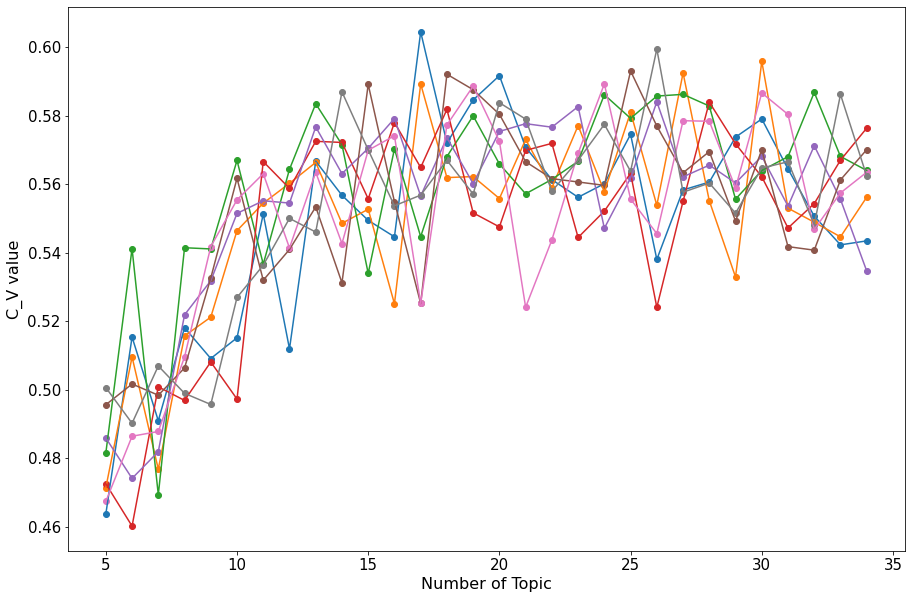

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
for elem in [26, 80, 189, 204, 238, 239, 254, 257]:
    grid = pd.read_csv("../Results/topicCVs_{}.csv".format(elem))
    ax.plot(grid.num_topics, grid.c_v)
    ax.scatter(grid.num_topics, grid.c_v)
ax.tick_params(axis='both', labelsize=15)
ax.set_xlabel('Number of Topic', fontsize=16)
ax.set_ylabel("C_V value", fontsize=16)

In [ ]:
def avgTopicSelectionPlot(docNumber = [26, 80, 189, 204, 238, 239, 254, 257]):
    CVs = np.array([0] * 30)
    for elem in docNumber:
        grid = pd.read_csv("../Results/topicCVs_{}.csv".format(elem))
        CVs = CVs + np.array(grid.c_v)
    Avg_CVs = CVs / np.array([len(docNumber)] * 30)
    plt.figure(figsize=(15, 10))
    plt.plot(range(5,35), Avg_CVs)
    plt.scatter(range(5,35), Avg_CVs)
    plt.tick_params(axis='both', labelsize=15)
    plt.xlabel('Number of Topic', fontsize = 16)
    plt.ylabel('C_V value', fontsize = 16)
    plt.title('Total Probability of Top 10 Words in each Topic', fontsize = 16)